In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
from time import sleep

In [4]:
env_name = "Taxi-v3"
epsilon = 1
decay_rate = 0.001
min_epsilon = 0.01
max_episodes = 1500
print_interval = 100
test_episodes = 3
lr = 0.4
gamma = 0.99
model_loops = 3

In [5]:
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Number of states: {n_states}\n"
      f"Number of actions: {n_actions}")

Number of states: 500
Number of actions: 6


In [6]:
q_table = np.zeros((n_states, n_actions))
model = np.zeros((n_states, n_actions), dtype=tuple)
memory = []

In [7]:
def choose_action(state):
    global q_table
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state, :])
    return action

In [8]:
def update_table(state, action, reward, done, next_state):
    global q_table
    q_table[state, action] += lr * (reward + gamma * np.max(q_table[next_state, :]) * (1 - done) - q_table[state, action])

In [9]:
running_reward = []
for episode in range(1, 1 + max_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        update_table(state, action, reward, done, next_state)
        model[state, action] = (reward, next_state)
        memory.append((state, action, done))
        for _ in range(model_loops):
            s, a, d = random.choice(memory)
            r, s_ = model[s, a]
            update_table(s, a, r, d, s_)
        
        episode_reward += reward
        state = next_state         
    epsilon  = epsilon - decay_rate if epsilon - decay_rate > min_epsilon else min_epsilon
    
    if episode == 1:
        running_reward.append(episode_reward)
    else:
        running_reward.append(0.99 * running_reward[-1] + 0.01 * episode_reward)
    if episode % print_interval == 0:
        print(f"Ep:{episode}| "
              f"Ep_reward:{episode_reward}| "
              f"Running_reward:{running_reward[-1]:.3f}| "
             f"Epsilon:{epsilon:.3f}| ")

Ep:100| Ep_reward:-722| Running_reward:-766.386| Epsilon:0.900| 
Ep:200| Ep_reward:-390| Running_reward:-565.627| Epsilon:0.800| 
Ep:300| Ep_reward:-64| Running_reward:-323.547| Epsilon:0.700| 
Ep:400| Ep_reward:-104| Running_reward:-188.221| Epsilon:0.600| 
Ep:500| Ep_reward:-17| Running_reward:-105.641| Epsilon:0.500| 
Ep:600| Ep_reward:-44| Running_reward:-58.203| Epsilon:0.400| 
Ep:700| Ep_reward:-15| Running_reward:-35.371| Epsilon:0.300| 
Ep:800| Ep_reward:5| Running_reward:-17.908| Epsilon:0.200| 
Ep:900| Ep_reward:5| Running_reward:-7.026| Epsilon:0.100| 
Ep:1000| Ep_reward:8| Running_reward:1.109| Epsilon:0.010| 
Ep:1100| Ep_reward:7| Running_reward:4.852| Epsilon:0.010| 
Ep:1200| Ep_reward:12| Running_reward:6.466| Epsilon:0.010| 
Ep:1300| Ep_reward:10| Running_reward:7.172| Epsilon:0.010| 
Ep:1400| Ep_reward:11| Running_reward:7.316| Epsilon:0.010| 
Ep:1500| Ep_reward:8| Running_reward:7.323| Epsilon:0.010| 


Text(0.5, 1.0, 'Running_reward')

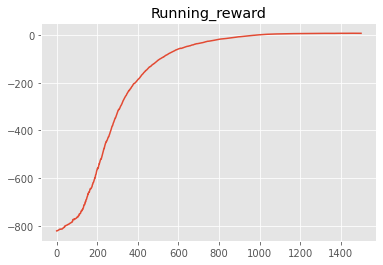

In [10]:
plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(max_episodes), running_reward)
plt.title("Running_reward")

In [14]:
for episode in range(1, 1 + test_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        env.render()
        clear_output(wait=True)
        sleep(0.3)
        episode_reward += reward
        state = next_state

    print(f"Ep:{episode}| "
          f"Ep_reward:{episode_reward}| ")
    env.close()

Ep:3| Ep_reward:8| 
